# PyTorch Computer Vision

Importing the relevant libraries

In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

Getting the dataset 

In [2]:
# setting up the training data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setting up the testing data 
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
# checking the first training sample
image, label = train_data[5]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0863, 0.3451, 0.7373, 0.6745, 0.5176, 0.4902, 0.5529,
           0.7804, 0.5608, 0.0353, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0784, 0.5137,
           0.7804, 0.8078, 0.7686, 0.7922, 0.9490, 1.0000, 1.0000, 0.9804,
           0.8706, 0.7725, 0.8078, 0.7373, 0.4941, 0.0667, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1373, 0.8392, 0.7490,
           0.7176, 0.6980, 0.6863, 0.6588, 0.5882, 0.6353, 0.6235, 0.5961,
           0.6196, 0.7020, 0.7176, 0.7412, 0.7647, 0.7255, 0.3216, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6667, 0.7451, 0.6745,
           0.6941, 0.6902, 0.6706, 0.6627, 0.6353, 0.6078, 0.5804, 0.6039,
           0.6627, 0.6824, 0.6863, 0.6863, 

In [4]:
# The shape of the image
image.shape

torch.Size([1, 28, 28])

Checking the samples of the training and testing datasets

In [5]:
len(train_data), len(test_data)

(60000, 10000)

We have 60000 training data and 10000 testing data. We now check the classes

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

We are dealing with 10 different kinds of clothes, therefore our problem is multiclass 

image shape is  torch.Size([1, 28, 28])


Text(0.5, 1.0, '2')

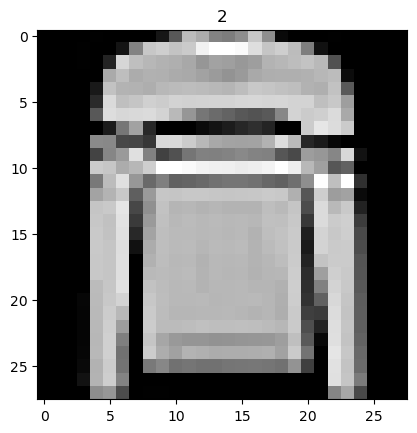

In [7]:
print('image shape is ', image.shape)
plt.imshow(image.squeeze(), cmap='gray') #cmap turns the image into grey
plt.title(label)

We can view a few more images

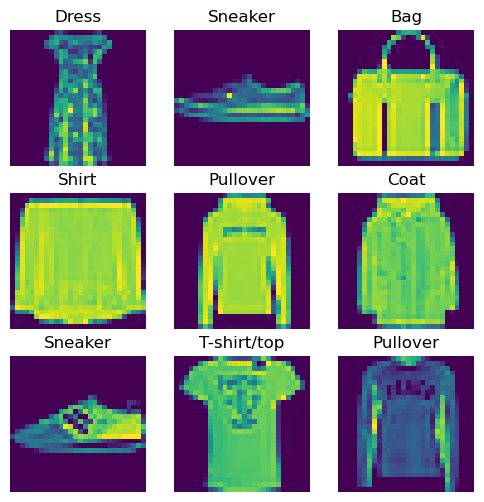

In [8]:
torch.manual_seed(4)
rows, cols = 3, 3
fig = plt.figure(figsize=(6,6))
for i in range(1, rows * cols +1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False)
  

## Prepating DataLoader

In [9]:
from torch.utils.data import DataLoader

In [55]:
# setting up the batchsize hyperparameter
batch = 32

# Turning the dataset into iterable batches
train_dataloader = DataLoader(
    train_data, 
    batch_size = batch,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size = batch,
    shuffle=False # Not necessary to shuffle the testing data
)

# Inspecting our dataloaders
print('length of the train_dataloader is',
     len(train_dataloader), 'and the length of the test_dataloader is',
        len(test_dataloader), '. The batchsize is', batch)

length of the train_dataloader is 1875 and the length of the test_dataloader is 313 . The batchsize is 32


## Building a Baseline Model

In [11]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [12]:
# Creating a flattening later
flatten_model = nn.Flatten() # All nn Modules function as a model, and can do a forward pass

# getting a single sample
x = train_features_batch[0]

# Flattening our sample
output = flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

We flatttened our data sample, taking it from the shape [color_channels, height, width] to [color_channels, height*width]. This turns the data into one long vector, so that it can work well with *nn.Linear()* layers

Creating ur first model with nn.Flatten() as the first layer

In [26]:
class MMISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super ().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Neural Nets like their input in vectors
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

We will now instantiate a model by setting the relevant parameters

In [28]:
torch.manual_seed(40)

# A model with input parameters
model = MMISTModel(input_shape=784, # One for every pixel 
                            hidden_units=10, # The number of units in the hidden layer of the nn
                            output_shape=len(class_names)) # One for every class
model

MMISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setting up the Loss, optimizer and evaluation metrics

In [30]:
import requests
from pathlib import Path

In [33]:
if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists!')
    
else:
    print('Downloading helper functions.py...')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

In [35]:
# Importing the accuracy metric
from helper_functions import accuracy_fn 

# Setting up the loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

## Training our model using the conventional method

In [64]:
epochs = 5
for epoch in range(epochs):
    print('Epoch: ', epoch)
    
    # TRAINING
    train_loss = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model.train()
        # Forward pass
        y_pred = model(x)
        
        # Calculating the loss
        loss = loss_fn(y_pred, y)
        train_loss +=loss # Cummulatively add up the loss per epoch
        
        # Zero Gradient
        optimizer.zero_grad()
        
        # Back propagation of the loss
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Printing out the samples we have seen
        if batch % 400 == 0:
            print('looked at ', batch * len(x),  'samples')
    train_loss /= len(train_dataloader)
    
    # TESTING
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:
            
            # Forward Pass
            test_pred = model(x)
            
            # Calculate the Loss
            loss = loss_fn(test_pred, y)
            test_loss += loss
            
            # Calculate the accuracy
            test_acc +=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        # Calculating the test metrics
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    print('Train Loss: ', train_loss, '| Test Loss: ', test_loss, '| Test Accuracy: ', test_acc)

    

Epoch:  0
looked at  0 samples
looked at  12800 samples
looked at  25600 samples
looked at  38400 samples
looked at  51200 samples
Train Loss:  tensor(0.3695, grad_fn=<DivBackward0>) | Test Loss:  tensor(0.4318) | Test Accuracy:  84.50479233226837
Epoch:  1
looked at  0 samples
looked at  12800 samples
looked at  25600 samples
looked at  38400 samples
looked at  51200 samples
Train Loss:  tensor(0.3682, grad_fn=<DivBackward0>) | Test Loss:  tensor(0.4184) | Test Accuracy:  85.55311501597444
Epoch:  2
looked at  0 samples
looked at  12800 samples
looked at  25600 samples
looked at  38400 samples
looked at  51200 samples
Train Loss:  tensor(0.3668, grad_fn=<DivBackward0>) | Test Loss:  tensor(0.4231) | Test Accuracy:  85.15375399361022
Epoch:  3
looked at  0 samples
looked at  12800 samples
looked at  25600 samples
looked at  38400 samples
looked at  51200 samples
Train Loss:  tensor(0.3659, grad_fn=<DivBackward0>) | Test Loss:  tensor(0.4322) | Test Accuracy:  84.78434504792332
Epoch:  

## Building a Convolutional Neural Network Model

In [ ]:
class FashionMNISTModel